# Desafío - Expansiones basales

* Para poder realizar este desafío debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el .zip a la sección correspondiente.


### Descripción

* Una aplicación interesante de los modelos predictivos es poder predecir propiedades de materiales compuestos a partir de diferentes combinaciones en el proceso y creación de estos.
* Para este desafío trabajaremos con un dataset que contiene diferentes medidas de materiales con los que se hace la mezcla de concreto.
* Nuestra tarea será utilizar estas medidas para predecir la capacidad de resistir fuerzas compresivas de vigas de concreto, a esta capacidad de soportar fuerzas que buscan reducir la superficie o volumen de un cuerpo se le conoce como fuerza compresiva.

## Ejercicio 1: Preparar el ambiente de trabajo
* Importe los módulos clásicos del trabajo en ciencia de datos.
* El archivo tiene el nombre compresive_strength_concrete.csv . Impórtelo y genere estadísticas descriptivas.
* En esta actividad su tarea será predecir la fuerza compresiva del concreto a partir de las medidas en la mezcla, para esto, utilice un modelo aditivo generalizado de la librería pyGAM .

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import missingno

warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('compresive_strength_concrete.csv')
df.head(3)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27


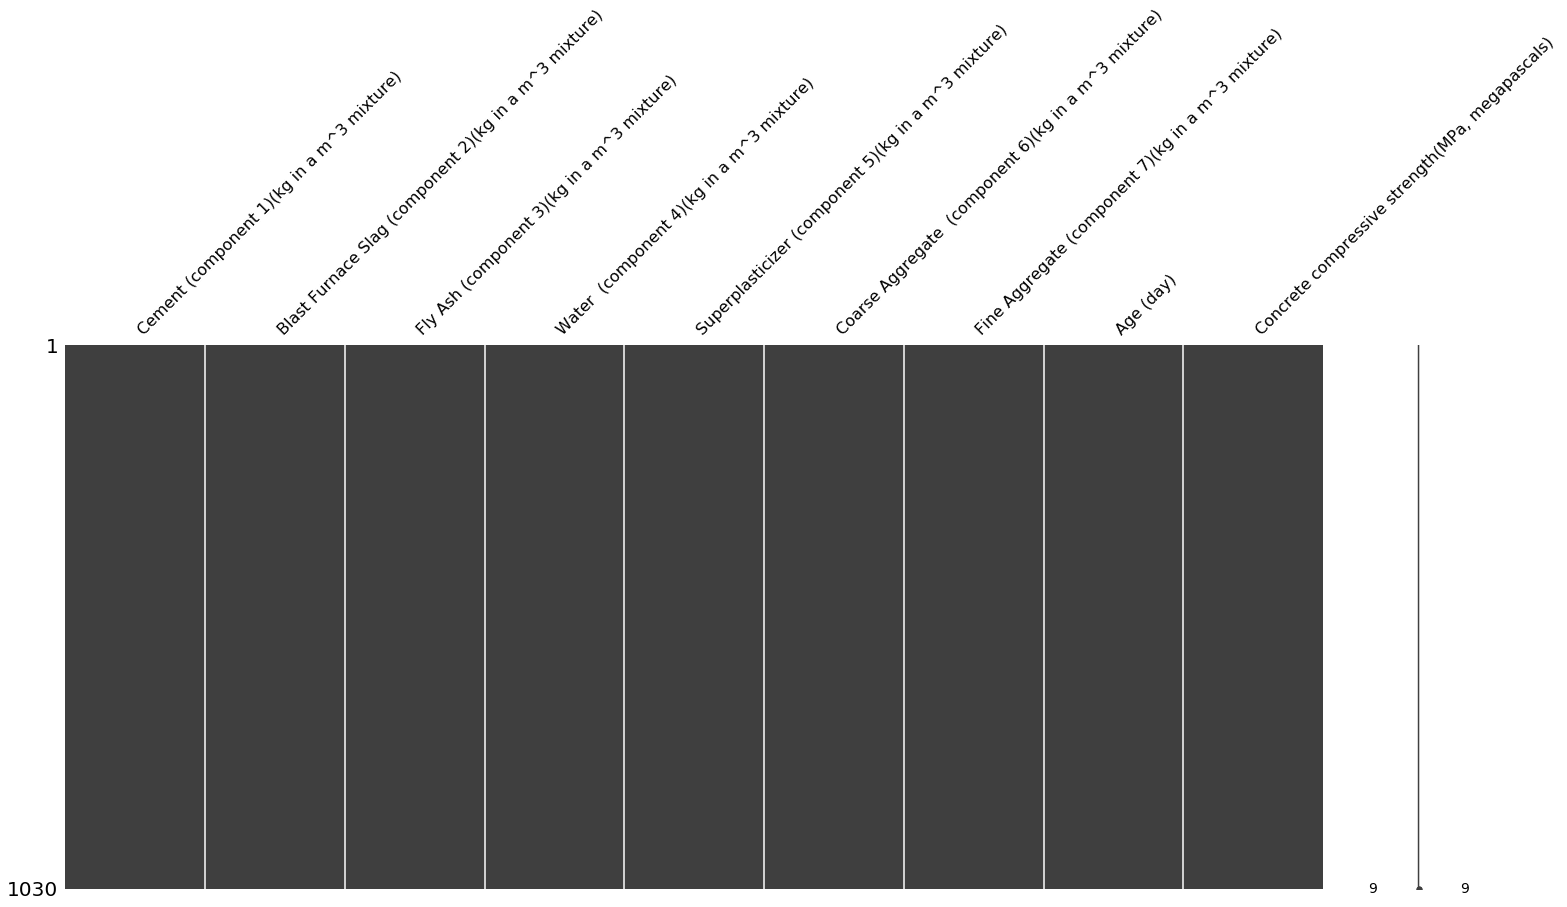

In [3]:
missingno.matrix(df);

In [4]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [5]:
df.columns = ['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate', 'age', 'concrete_compressive_strength']
df.head(3)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement                           1030 non-null float64
blast_furnace_slag               1030 non-null float64
fly_ash                          1030 non-null float64
water                            1030 non-null float64
superplasticizer                 1030 non-null float64
coarse_aggregate                 1030 non-null float64
fine_aggregate                   1030 non-null float64
age                              1030 non-null int64
concrete_compressive_strength    1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


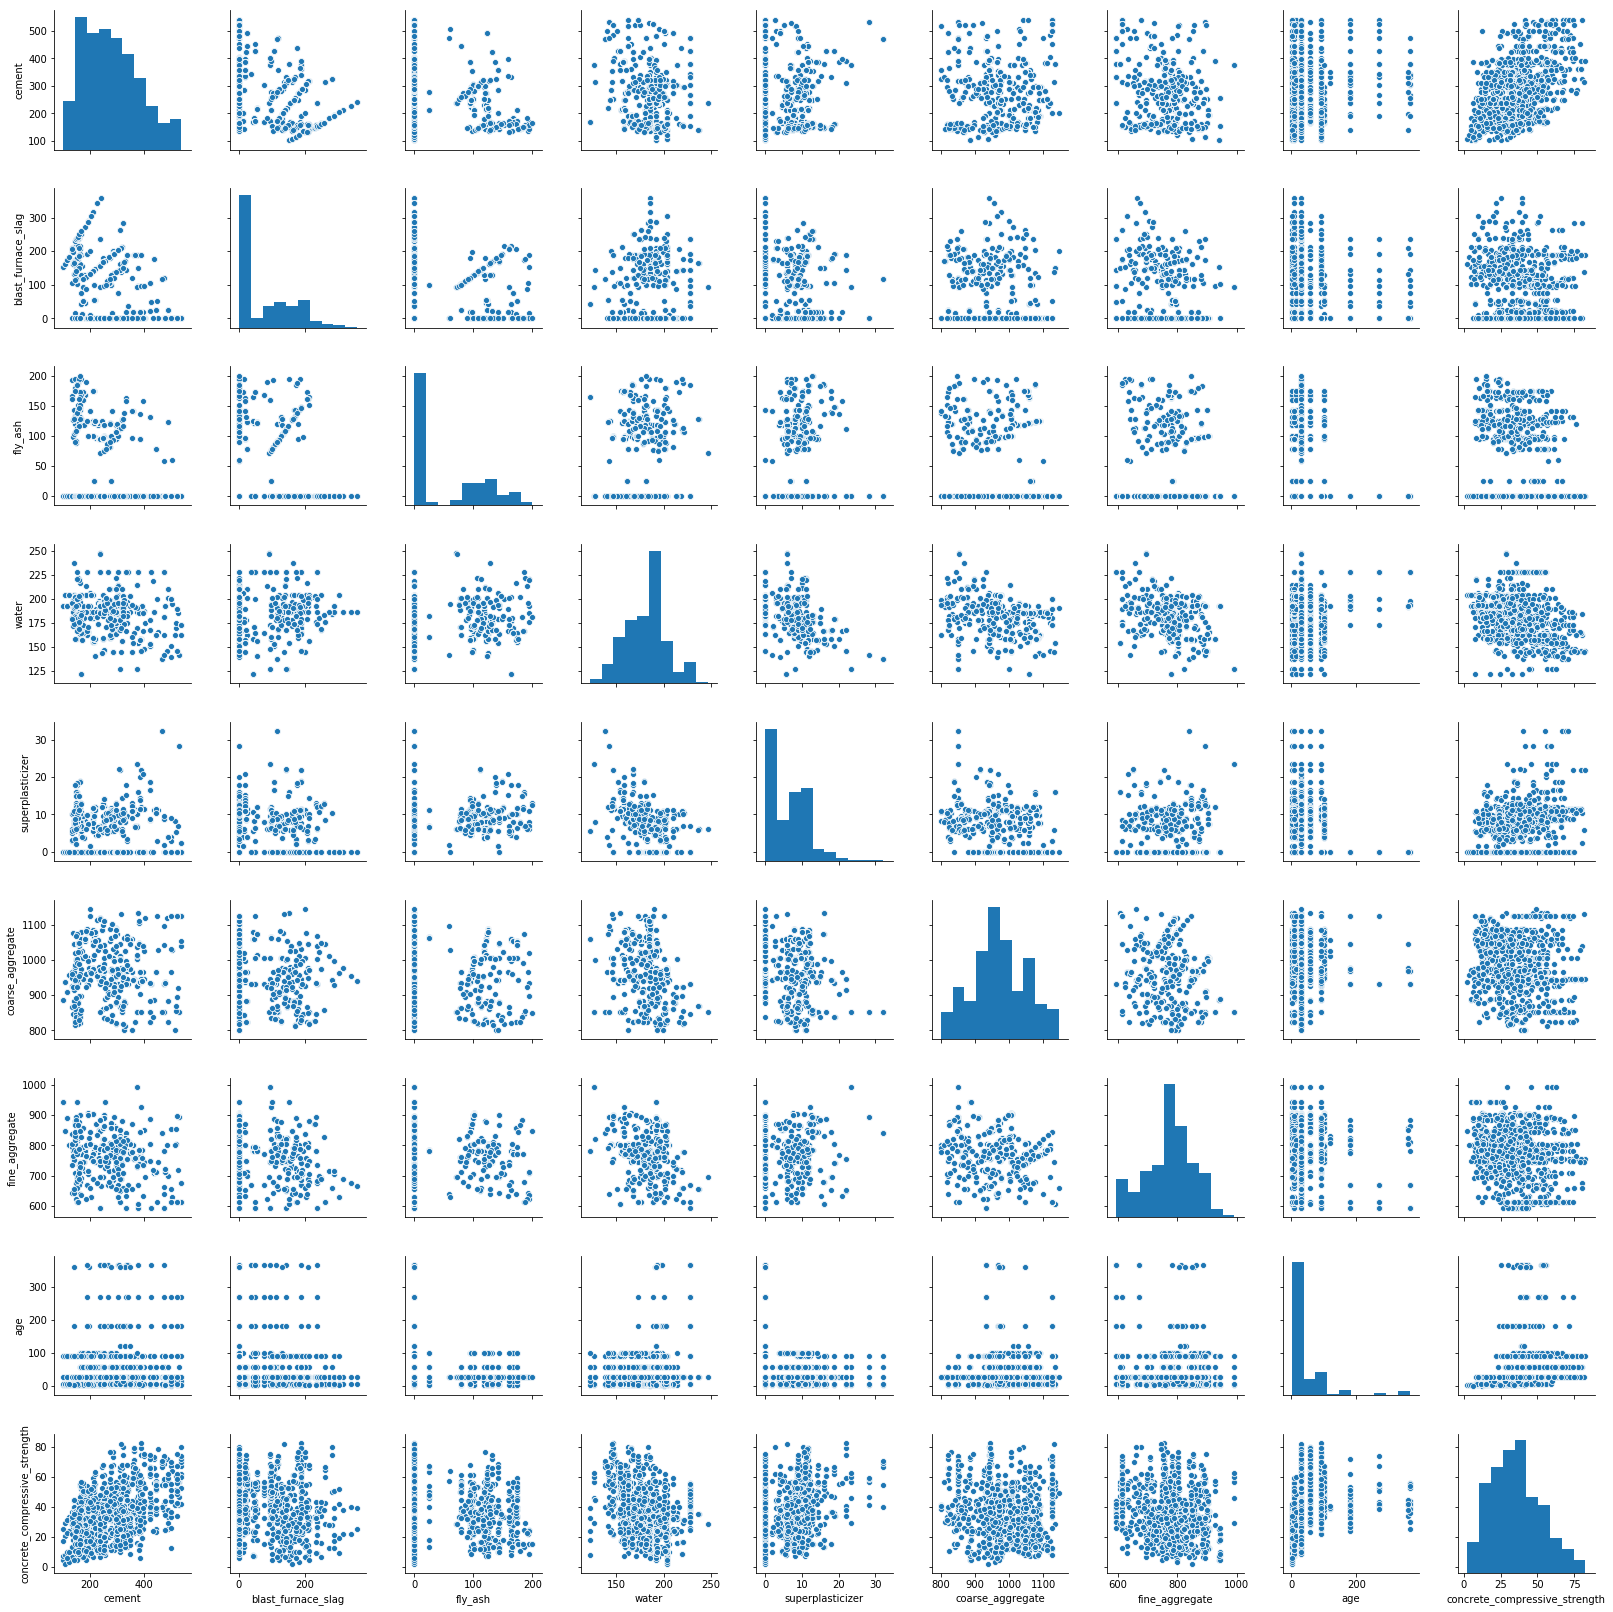

In [7]:
sns.pairplot(df);

In [8]:
def plot_columns_behaviour(df, kind='countplot'):
    cols = list(df.columns)
    n_cols = 3
    n_rows = np.ceil(len(cols) / n_cols)
    plt.figure(figsize=(n_cols * 5, 5 * n_rows))

    for n, col_name in enumerate(cols):
        plt.subplot(n_rows, n_cols, n + 1)

        col = df[col_name]

        if kind == 'countplot':
            sns.countplot(y=col)
            plt.title(col_name)
            plt.xlabel("")
        else:
            sns.distplot(col, rug=True)
            plt.title(col_name)
            plt.xlabel("")
            
            mean = col.mean()
            median = col.median()
            
            plt.axvline(mean, color='tomato',
                        linestyle='--', label='mean')
            plt.axvline(median, color='green',
                        linestyle='--', label='median')
            plt.legend()
        plt.tight_layout()

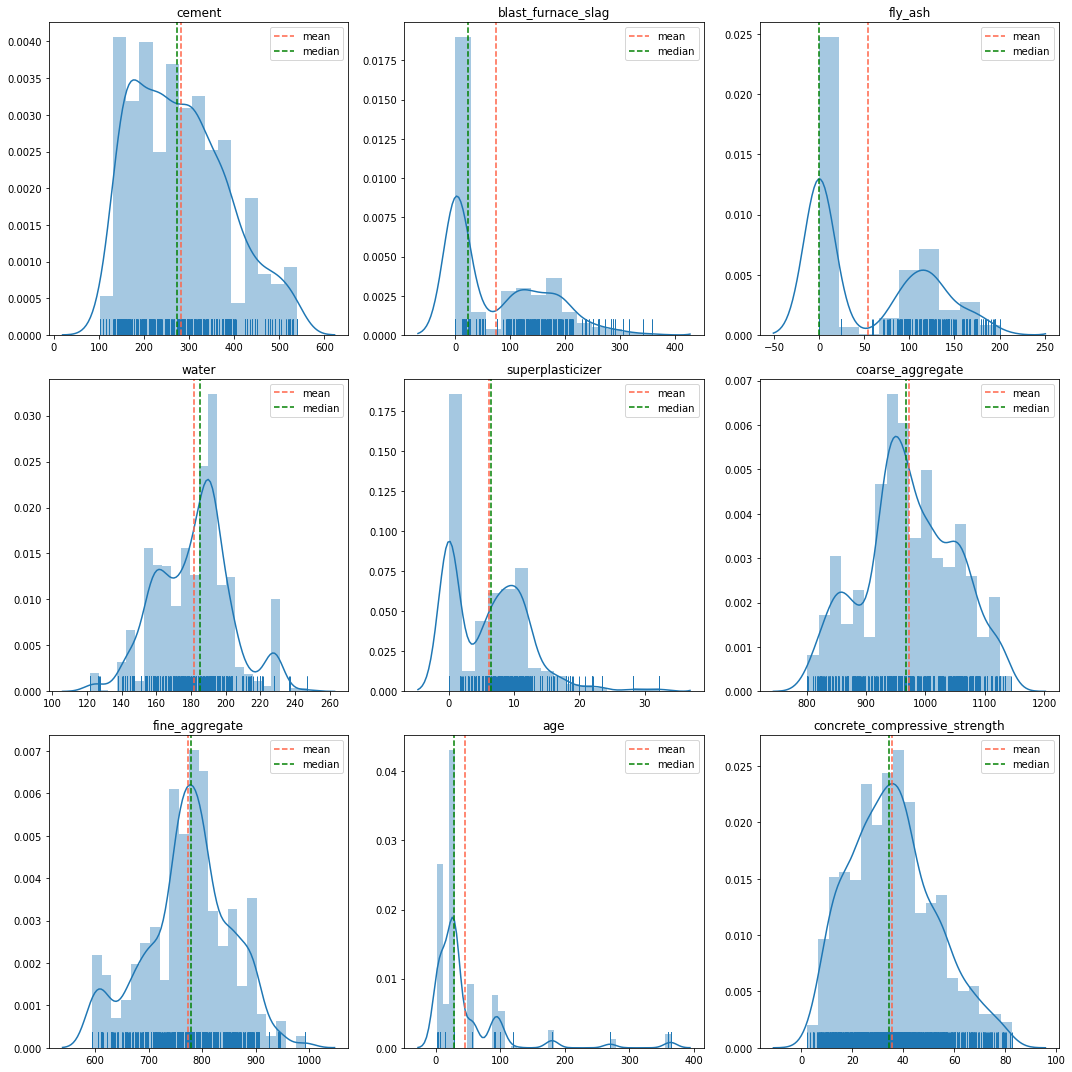

In [9]:
plot_columns_behaviour(df, 'numeric')

In [10]:
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


#### Observaciones

- `concrete_compressive_strength` (vector objectivo) tiene una destribución parecida a la normal.
- se ve una leve correlación positiva entre el vector objetivo y el cemento.

### Ejercicio 2: Descripción
* El vector objetivo tiene el nombre de Concrete compressive strength(MPa, megapascals) .
* Los nombres de las variables son muy poco amigables, dado que contienen espacios, paréntesis y otros elementos difíciles de referenciar. Se sugiere (pero no se obliga) renombrar las variables o acceder a éstas mediante notación de índice iloc .
* Inspeccione el tipo de datos de la base de datos, fijándose en su naturaleza y distribución. Decida si es necesario normalizarlos/escalarlos.

Los puntos 1 y 2 los hice en la sección anterior. Sobre el tercer punto, debido a la diferencia de escala en los valores, es necesario normalizar:

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df_scaled.head(3)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,0.863154,-1.217670,-0.279733,2.645408
1,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,1.056164,-1.217670,-0.279733,1.561421
2,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,3.553066,0.266627


### Ejercicio 3: Modelo
* En base al vector objetivo, decida el mejor modelo e impórtelo con pygam. Condicional a ésto, importe las métricas de desempeño asociadas.
* Genere conjuntos de entrenamiento y validación.
* Genere un primer modelo sin implementar la función gridsearch. Repórte el hiperparámetro lam así como las métricas de desempeño asociadas.
* Genere un segundo modelo implementando gridsearch en lambda con un logspace entre -3 y 3. Comente sobre el mejor hiperparámetro y sus métricas de desempeño.

In [12]:
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error
from pygam import LinearGAM

In [13]:
X = df_scaled.iloc[:, :-1]
y = df_scaled.concrete_compressive_strength

N = X.shape[0]

X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.33, random_state = 2082019)

In [14]:
linear_gam = LinearGAM().fit(X_train, y_train)

/home/nico/anaconda3/lib/python3.6/site-packages/numpy/matrixlib/defmatrix.py:71: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


In [15]:
def report(model):
    print('Lam: {}'.format(model.lam))
    y_hat = model.predict(X_test)
    print('MSE: {}'.format(mean_squared_error(y_test, y_hat)))
    print('MAE: {}'.format(median_absolute_error(y_test, y_hat)))
    print('R2: {}'.format(r2_score(y_test, y_hat)))

In [16]:
report(linear_gam)

Lam: 0.6
MSE: 0.09990506020179193
MAE: 0.21068465109248768
R2: 0.9010695561719332


In [17]:
search_params = { 'lam': np.logspace(0, -3, 3) }
model_with_gridsearch = LinearGAM().gridsearch(X_train, y_train)
report(model_with_gridsearch)

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--/home/nico/anaconda3/lib/python3.6/site-packages/numpy/matrixlib/defmatrix.py:71: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)
  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:01/home/nico/anaconda3/lib/python3.6/site-packages/numpy/matrixlib/defmatrix.py:71: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)
 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:01/home/nico/anac

Lam: 0.25118864315095796
MSE: 0.09922466350769764
MAE: 0.19821438232830185
R2: 0.9017433153067552


En base a las estadísticas, el segundo modelo es mejor porque tiene mejor R2, menor MSE y menor MAE.

### Ejercicio 4: Dependencia Parcial
* En base al mejor modelo, reporte el comportamiento de la dependencia parcial de cada atributo.
* Para ello, genere una función que tenga como argumento de entrada el modelo estimado y devuelva una grilla con todos los gráficos de dependencia parcial.
* Reporte brevemente sobre qué atributos están asociados a mayores y menores. niveles de resistencia.

_La siguiente función está basado en el código expuesto en la lectura del curso_:

In [18]:
from pygam.utils import generate_X_grid

def parcial_dependency(model):

    x_grid = generate_X_grid(model)
    attribute = X_train.columns
    
    cols = 4;
    rows = np.ceil(len(attribute) / cols)

    for i, n in enumerate(range(len(attribute))):
        plt.subplot(rows, cols, i + 1)

        # extraemos la dependencia parcial y sus intervalos de confianza al 95%
        partial_dep, confidence_intervals = model.partial_dependence(x_grid, feature= i + 1, width=0.95)
        
        # Visualizamos la recta
        plt.plot(x_grid[:, n], partial_dep, color='tomato')
        
        # Generamos una visualización de los intervalos de confianza
        plt.fill_between(x_grid[:, n], confidence_intervals[0][:, 0], confidence_intervals[0][:, 1], color='tomato', alpha=.25)

        # agregamos el nombre del atributo
        plt.title(attribute[n])
        plt.plot(X_train[attribute[n]], [plt.ylim()[0]] * len(X_train[attribute[n]]), '|', color='orange', alpha=.5)
        plt.tight_layout()

/home/nico/anaconda3/lib/python3.6/site-packages/numpy/matrixlib/defmatrix.py:71: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


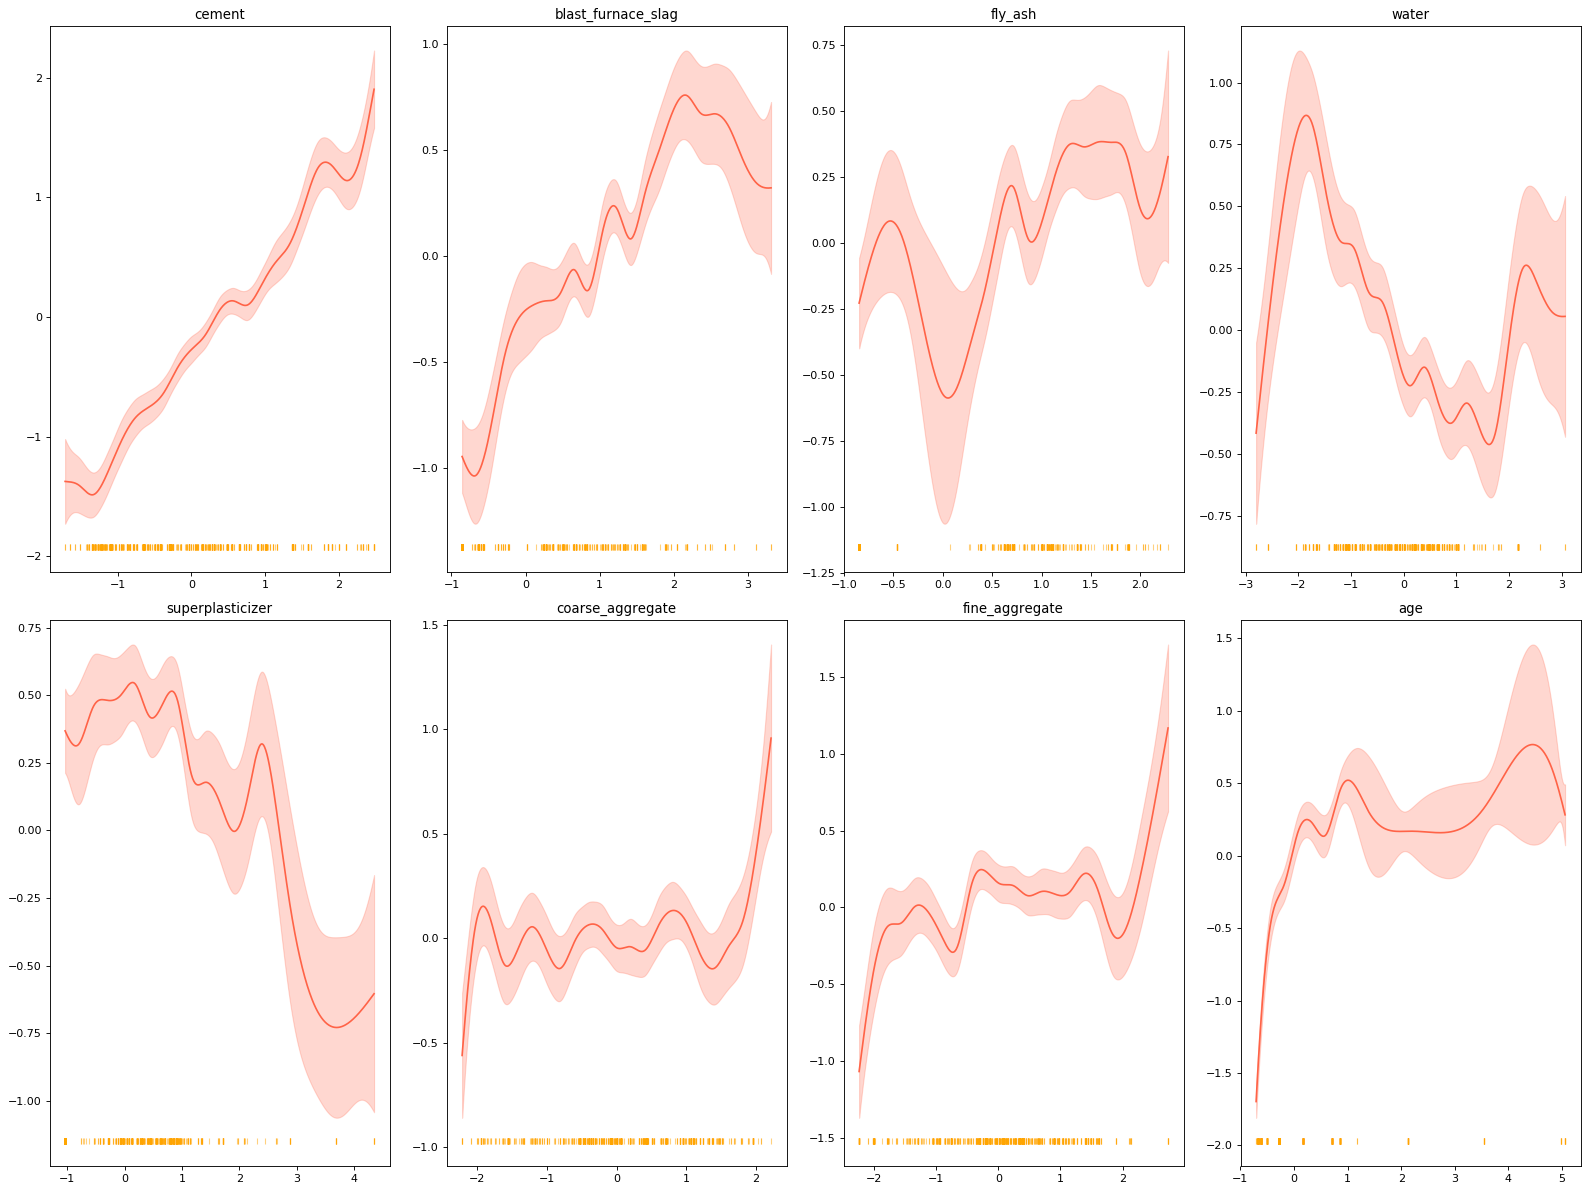

In [19]:
plt.rcParams["figure.figsize"] = (20, 15)
plt.rcParams["figure.dpi"] = 80
parcial_dependency(model_with_gridsearch)

#### Observaciones:

Los atributos que están asociados a **mayor** resistencia:

- Cemento
- Superplasticizer, cercano a 0 tiene una resistencia 0.5 lo cual es alto comparado a las otras gráficas, aunque la tendencia es a disminuir la resistencia a medida que aumenta de valor.
- Blast furnace slug, se mueve a valores bajos (cerca del 0) pero a partir ese punto comienza a aumenta la resistencia.

Los atributos que están asociados a una **menor** resistencia:

- Coarse aggregate, oscila en valores de resistencia 0, para valores muy altos ve aprecia una alza en resistencia, pero la tendencia es oscilatoria.
- Fine aggregate, también tiene un comportamiento oscilatorio en la mayoría, pero en la mayoría está muy cercano a 0 de resistencia.
- Para Fly ash, la resistencia oscila entre -0.25 y 0.25 (para valores cercanos a 0).